# Изучение рынка заведений общественного питания Москвы

- Автор:Кононов С.В.
- Дата:26.04.2005

# Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка Москвы. На основе полученных данных выявить наиболее востребованные типы ресторанов общественного питания, а также подходящего места для их размещения

**Задачи:**

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце Сhurn с другими данными.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа будем использовать датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `rest_info.csv` — содержит информацию о заведениях общественного питания;
- `rest_price.csv` —   содержит информацию о среднем чеке в заведениях общественного питания.

**Описание датасета `rest_info.csv`**

- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

0 — заведение не является сетевым;
1 — заведение является сетевым.
- seats — количество посадочных мест.

**Описание датасета `rest_price.csv`**

- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:

«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.

Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.

Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.



##  Загрузка данных и знакомство с ними


In [1]:
!pip install phik -U

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from scipy.stats import spearmanr
import re

In [3]:
# Загружаем данные о заведениях общественного питания Москвы
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
                   
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [4]:
# Выводим информацию о info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим первые 5 строк info_df
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


### Промежуточный вывод по датасету `info_df`

Датасет `info_df` содержит 9 столбцов и 8406 строк

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов не требуют предоработки
- 6 столбцов представлены в типе данных `object`. Значения в столбцах `rating` и `seats` представлены в формате `float64`. Столбец `chain` представлен типом данных `int64`.

Столбец `chain` которое показывает, является ли заведение сетевым и содержит значения 1 или 0 — размерность этих данных можно оптимизировать. Типы данных остальных столбцов не нуждаются в предоработки.
- Пропуски содержатся в столбцах `hours` и `seats`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

---

In [6]:
# Выводим информацию о price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
# Выводим первые 5 строк price_df
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN



### Промежуточный вывод по датасету `price_df`

Датасет `price_df` содержит 5 столбцов и 4058 строк

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов не требуют предоработки
- 3 столбца представлены в типе данных `object`. Значения в столбцах `middle_avg_bill` и `middle_coffee_cup` представлены в формате `float64`.

На первый взгдяд типы данных столбцов не нуждаются в предоработке
- Пропуски содержатся во всех столбцах, кроме `id`. Особенно большое число пропусков содержится в столбце `middle_coffee_cup`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма


In [8]:
# Объединяем info_df и price_df в один датафрейм
join_df = info_df.merge(price_df, how = 'left', on = 'id')

In [9]:
# Общая информация объединенного датафрейма
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [10]:
# Первые 5 строк объединенного датафрейма
join_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


После объединения двех датафреймов в один по столбцу `id` методом `left` получился датафрейм join_df, который состоит из 13 столбцов и содержит 8406 строк

## Предобработка данных


In [11]:
# Оптимизируем тип данных для столбца 'chain'
join_df['chain'] = pd.to_numeric(join_df['chain'], downcast = 'integer')

In [12]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB


### Обрабатываем пропущенные значения

In [13]:
# Считаем количество пропусков в каждом столбце
join_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# Считаем процент пропусков в каждом столбце 
round(join_df.isna().sum() / join_df.shape[0] * 100, 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

В столбце `hours` отсутствует информация для 536 заведений (6.38%). Это может быть связано с тем, что они временно закрыты или работают по нерегулярному графику.

В столбце, содержащем количество посадочных мест (`seats`), почти половина значений отсутствует. Это может быть вызвано тем, что владельцы не предоставили эту информацию, особенно в случае небольших кафе или уличных киосков.

Что касается столбцов с ценами — `price` и `avg_bill` — здесь наблюдается значительное количество пропусков (60.56% и 54.60% соответственно). Высокий уровень пропусков может объясняться тем, что не все заведения публикуют меню с ценами, или для некоторых категорий, таких как уличная еда, сложно определить средний чек.

Пропуски в столбцах `middle_avg_bill (62.54%)` и `middle_coffee_cup (93.64%)` напрямую связаны с отсутствующими данными в столбце `avg_bill`, так как эти столбцы заполнялись на основе его значений. Следует отметить, что столбец `middle_coffee_cup` содержит более 90% пропусков, что может свидетельствовать о том, что кофе не является основным продуктом для многих заведений. 

Для того, чтобы с этими столбцами в дальнейшем было проще работать, заменим пропуски на значение-индикатор **-1**

In [15]:
# Во всех столбцах с пропусками заменяем их на -1
for column in join_df.columns:
    if join_df[column].isna().sum() > 0:
        join_df[column] = join_df[column].fillna(-1)
        
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   float64
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   float64
 12  middle_coffee_cup  8406 non-null   float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB


### Проверяем данные на явные и неявные дубликаты

In [16]:
# Проверяем на явные дубликаты
join_df.duplicated().sum()

0

In [17]:
# Проверяем на явные дубликаты в столбце id, name и address
for column in ['id', 'name', 'address']:
    print(f'Количество дубликатов в столбце {column}:')
    print(join_df[column].duplicated().sum(), '\n')

Количество дубликатов в столбце id:
0 

Количество дубликатов в столбце name:
2792 

Количество дубликатов в столбце address:
2653 



In [18]:
# Преобразуем столбцы name и address в нижний регистр:
join_df['name'] = join_df['name'].str.lower()
print(join_df['name'].duplicated().sum())

join_df['address'] = join_df['address'].str.lower()
print(join_df['address'].duplicated().sum())

2894
2654


In [19]:
join_df.duplicated(subset = ['name', 'address']).sum()

4

В итоге получилось, что в 4 строках содержатся дубликаты по названию и адресу

Остальные дубликаты в столбце `name` могут быть связаны с тем, что некоторые компании имеют франшизы или сети заведений.
А дубликаты в столбце `address` связаны с тем, что несколько заведений могут находиться в одном здании.

In [20]:
# Удаляем эти 4 дубликата 
join_df = join_df.drop_duplicates(subset = ['name', 'address'])

In [21]:
for column in ['category', 'district', 'chain']:
    print(f'Уникальные значения столбца {column}:')
    print(join_df[column].unique(), '\n')
    

Уникальные значения столбца category:
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая'] 

Уникальные значения столбца district:
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ'] 

Уникальные значения столбца chain:
[0 1] 



В столбцах `category`, `district`, `chain` дубликатов не обнаружено

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:

  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [22]:
join_df['is_24_7'] = join_df['hours'] == 'ежедневно, круглосуточно'

join_df.head(20)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,-1,-1,-1.0,-1.0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1.0,-1,Цена чашки капучино:155–185 ₽,-1.0,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,-1.0,False
5,8a343546b24e4a499ad96eb7d0797a8a,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,-1.0,средние,-1,-1.0,-1.0,False
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,-1.0,False
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,-1.0,False
8,36aeb0ffa69c48fdb0021549520deb10,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,-1.0,False
9,487167877eb04288bc90d4fa80646fc2,готика,кафе,"москва, ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,-1.0,False


---

### Промежуточный вывод


In [23]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              8402 non-null   float64
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    8402 non-null   float64
 12  middle_coffee_cup  8402 non-null   float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float64(4), int8(1), object(8)
memory usage: 869.7+ KB


В результате предоработки данных все пропуски были заменены на значение-индикатор **-1**, было удалено 4 строки с пропусками, а также создан новый столбец `is_24_7`.

## Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [24]:
join_df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Text(0, 0.5, 'Категория')

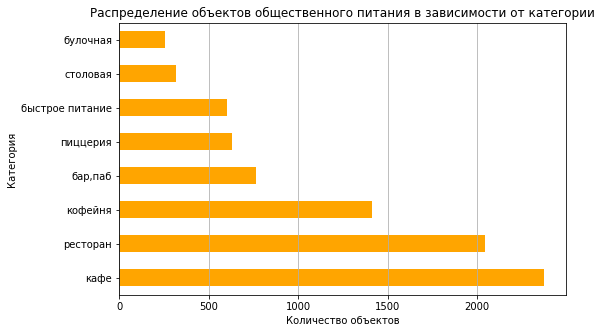

In [25]:
plt.figure(figsize=(8,5))

join_df['category'].value_counts().plot(kind = 'barh',
                                        color = 'orange',
                                        title = 'Распределение объектов общественного питания в зависимости от категории'
                                       )
plt.grid(axis = 'x')

plt.xlabel('Количество объектов')
plt.ylabel('Категория')

В данных представленно 8 категорий заведений. Наиболее популярными являются **кафе, рестораны и кофейни**, с количеством заведений 2376, 2042 и 1413 соответственно. В то же время, наименее популярными являются **булочные и столовые**, количество которых составляет всего 315 и 256 заведений соответственно.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [26]:
join_df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Text(0, 0.5, 'Административный округ Москвы')

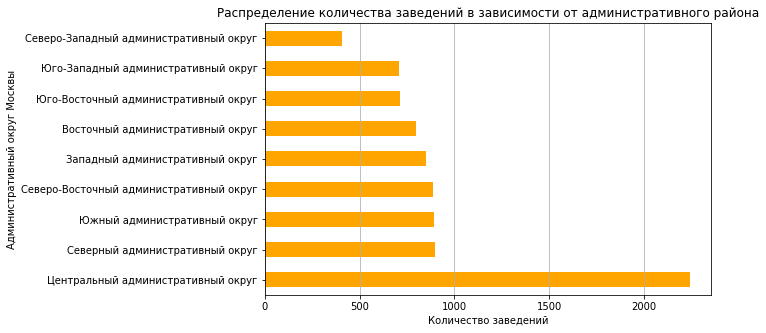

In [27]:
plt.figure(figsize = (8,5))

join_df['district'].value_counts().plot(kind = 'barh',
                                        color = 'orange',
                                        title = 'Распределение количества заведений в зависимости от административного района'
                                       )

plt.grid(axis = 'x')

plt.xlabel('Количество заведений')
plt.ylabel('Административный округ Москвы')

Явный лидером по количеству заведений является **Центральный административный округ**, в котором насчитывается более двух тысяч заведений — 2242., а аутсайдером - **Северо-Западный административный округ**, в нём всего лишь 409 заведениями общественного питания. В остальных округах количество заведений примерно одинаково, в среднем составляя около 800 .

In [28]:
center_df = join_df[join_df['district'] == 'Центральный административный округ']
center_df['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

Text(0, 0.5, 'Категория')

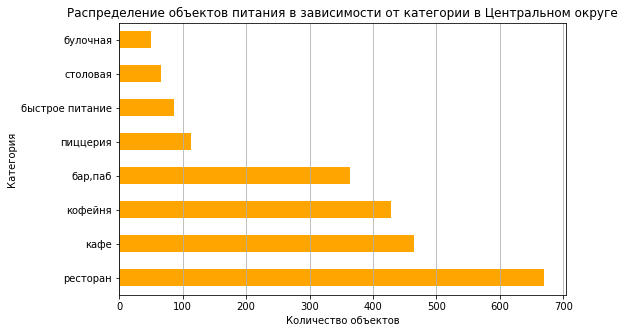

In [29]:
plt.figure(figsize=(8,5))

center_df['category'].value_counts().plot(kind = 'barh',
                                        color = 'orange',
                                        title = 'Распределение объектов питания в зависимости от категории в Центральном округе'
                                       )
plt.grid(axis = 'x')

plt.xlabel('Количество объектов')
plt.ylabel('Категория')

График показывает, что общая тенденция популярности категорий заведений сохраняется и в Центральном административном округе. Однако стоит отметить, что рестораны уверенно занимают лидирующую позицию с заметным отрывом — их здесь целых 670. Кафе, кофейни, бары и пабы имеют примерно одинаковое количество заведений, превышающее 350 в каждой категории. В то же время булочные, столовые, заведения быстрого питания и пиццерии значительно уступают по популярности другим четырем категориям: пиццерий всего 113, а количество заведений остальных трех категорий не превышает 100.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [30]:
copy_join_df = join_df.copy()
copy_join_df['chain'] = copy_join_df['chain'].replace({0: 'Несетевое' ,
                                                       1: 'Сетевое'})
copy_join_df['chain'].value_counts()

Несетевое    5199
Сетевое      3203
Name: chain, dtype: int64

Text(0, 0.5, '')

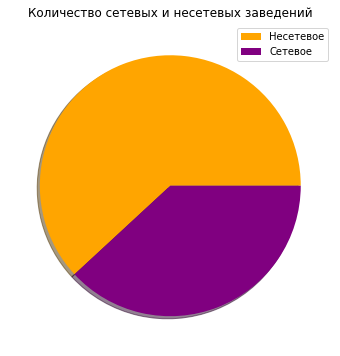

In [31]:
plt.figure(figsize=(6,6))

copy_join_df['chain'].value_counts().plot(kind = 'pie',
                                     title = 'Количество сетевых и несетевых заведений',
                                     shadow=True,
                                     colors=['orange','purple'],
                                     legend=True,
                                     labels=None
                                    )

plt.ylabel('')

На графике видно, что количество несетевых заведений превышает количество сетевых. Это также подтверждается числовыми данными: несетевых заведений — 5199, в то время как сетевых — 3203. 

In [32]:
copy_join_df = join_df.copy()
copy_join_df['chain'] = copy_join_df['chain'].replace({0: 'Несетевое' ,
                                                       1: 'Сетевое'})
group_df = copy_join_df.groupby('category')['chain'].value_counts().unstack()
group_df['% сетевых от общего количества'] = round(group_df['Сетевое'] / (group_df['Сетевое'] + group_df['Несетевое']) * 100, 2)
group_df.sort_values(by='% сетевых от общего количества', ascending = False)

chain,Несетевое,Сетевое,% сетевых от общего количества
category,,,
булочная,99,157,61.33
пиццерия,303,330,52.13
кофейня,693,720,50.96
быстрое питание,371,232,38.47
ресторан,1313,729,35.70
кафе,1597,779,32.79
столовая,227,88,27.94
"бар,паб",596,168,21.99


Text(0.5, 0, 'Количество заведений')

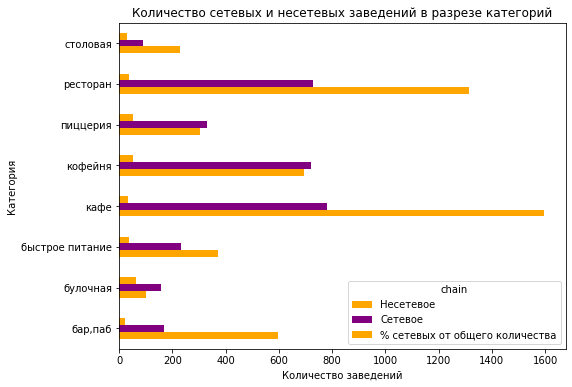

In [33]:
group_df.plot(kind = 'barh',
              color = ['orange', 'purple'],
              title = 'Количество сетевых и несетевых заведений в разрезе категорий',
             figsize=(8,6))

plt.ylabel('Категория')
plt.xlabel('Количество заведений')

На графике видно, что сетевые заведения преобладают в трех категориях:
- Булочная: 157 сетевых против 99 несетевых (61.33%)
- Пиццерия: 330 сетевых против 303 несетевых (52.13%)
- Кофейня: 720 сетевых против 693 несетевых (50.96%)

В остальных категориях, сетевых заведений менее 40% .

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [34]:
new_join_df = join_df[join_df['seats'] >= 0] # убираем значения-индикаторы
seats_df = new_join_df.sort_values(by='seats', ascending = False)
seats_df['seats'].head(20)

6641    1288.0
6574    1288.0
6771    1288.0
6524    1288.0
6658    1288.0
6807    1288.0
6684    1288.0
6838    1288.0
6808    1288.0
6518    1288.0
6690    1288.0
4231    1200.0
2713    1040.0
2722    1040.0
2770    1040.0
2966    1040.0
4245     920.0
4180     920.0
5486     760.0
7987     675.0
Name: seats, dtype: float64

Text(0.5, 0, 'Количество посадочных мест')

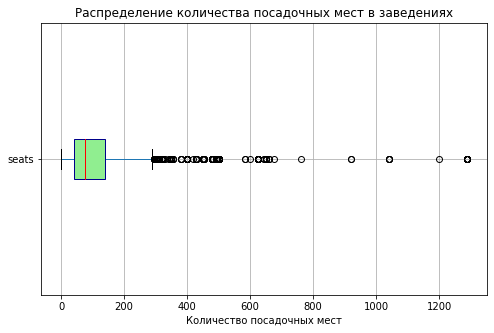

In [35]:
boxplot = new_join_df.boxplot(column = 'seats',
                          vert = False,
                         figsize = (8, 5),
                              patch_artist=True,  # Включаем заливку коробок
                            boxprops=dict(facecolor='lightgreen', color='darkblue'),
                              medianprops=dict(color='red')
                             )

boxplot.set_title('Распределение количества посадочных мест в заведениях')
boxplot.set_xlabel('Количество посадочных мест')

На графике явно выдны аномально большие значения. Некоторые заведения имеют 1040, 1200 и 1280 посадочных местмест. Данные значения могут быть связаны с тем, что некоторые заведения могут иметь VIP-залы или зоны для мероприятий, что может сильно влиять на количество посадочных мест.

Наиболее типичное значение посадочных мест для каждой из категорий:

In [36]:
new_group_df = new_join_df.groupby('category')
new_group_df['seats'].median()

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float64

Это наглядно демонстрируют следующие графики

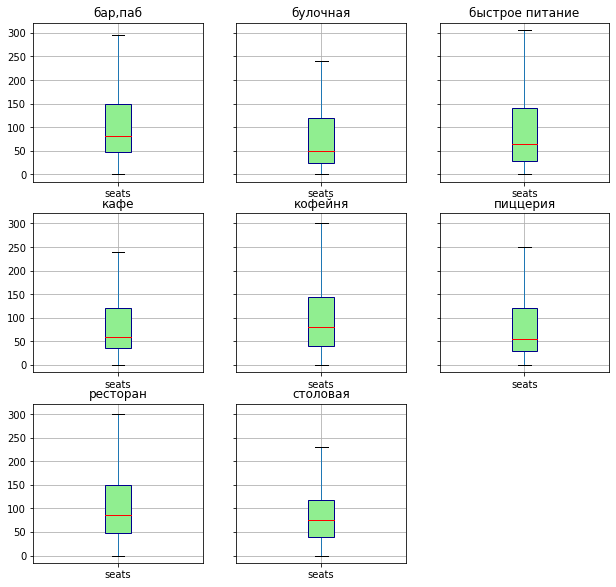

In [37]:
boxplot_new = new_group_df.boxplot(column = 'seats',
                                   figsize = (10,10),
                                  showfliers=False,
                                  patch_artist=True,
                                   boxprops=dict(facecolor='lightgreen', color='darkblue'),
                                  medianprops=dict(color='red')
                                  )

Булочные имеют наименьшее среднее количество посадочных мест — всего 50, в то время как рестораны обладают наибольшим средним значением, равным 86 местам. Размах между средними составляет 36.0 .

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [38]:
round(new_group_df['rating'].mean(), 2)

category
бар,паб            4.39
булочная           4.26
быстрое питание    4.04
кафе               4.15
кофейня            4.28
пиццерия           4.28
ресторан           4.29
столовая           4.24
Name: rating, dtype: float64

Text(0, 0.5, 'Категория')

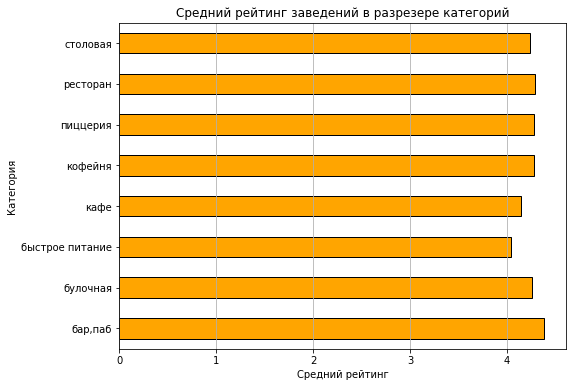

In [39]:
plt.figure(figsize=(8,6))

new_group_df['rating'].mean().plot(kind = 'barh',
                                   color = 'orange',
                                   edgecolor = 'black',
                                   title = 'Средний рейтинг заведений в разрезере категорий')

plt.grid(axis = 'x')

plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')

График демонстрирует, что средние рейтинги незначительно отличаются в каждой категории. Также можно заметить, что все они превышают 4, это показывает, что на рынке необходимо сразу удерживать высокий стандарт качества, независимо от формата заведения.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [40]:
corr_matrix = join_df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

correlation_matrix = join_df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281253
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'district'),
  Text(0, 2.5, 'category'),
  Text(0, 3.5, 'is_24_7'),
  Text(0, 4.5, 'chain'),
  Text(0, 5.5, 'seats')])

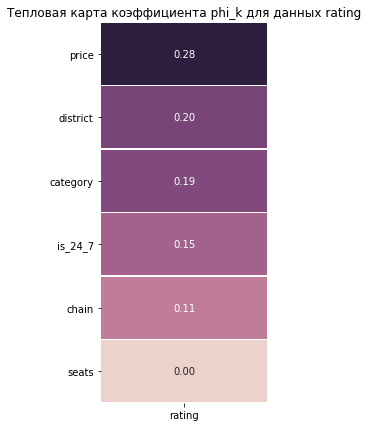

In [41]:
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

plt.figure(figsize=(3, 7))

sns.heatmap(data_heatmap,
            cmap=sns.cubehelix_palette(as_cmap=True),
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            cbar=False
           )

plt.title('Тепловая карта коэффициента phi_k для данных rating')
plt.yticks(rotation=0)

Наибольший коэффициент корреляции у столбца `rating` со столбцом `price`.
Проверим влияет ли категория цен в заведении на рейтинг заведения.

In [42]:
new_join_df = join_df.copy()

price_mapping = {
    'низкие': 1,
    'ниже среднего': 2,
    'средние': 3,
    'выше среднего': 4,
    'высокие': 5
}

new_join_df['price_numeric'] = new_join_df['price'].replace(price_mapping)
new_join_df = new_join_df.dropna(subset=['price_numeric', 'rating'])
                     
# Расчёт корреляции Спирмена
corr, p_value = spearmanr(new_join_df['price_numeric'], new_join_df['rating'])
print(f"Коэффициент корреляции Спирмена: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

Коэффициент корреляции Спирмена: 0.200
P-value: 0.0000


p-value < 0.05 следовательно связь является статистически значимой

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [43]:
set_df = join_df[join_df['chain'] == 1]
                 
name_counts = (
    set_df.groupby('name')  
    .size()                  
    .reset_index(name='count') 
    .sort_values('count', ascending=False)
    .head(15)
)

# Добавляем средний рейтинг для этих названий
result = (
    set_df[set_df['name'].isin(name_counts['name'])]  # Фильтруем топ-15
    .groupby('name')
    .agg(
        count=('name', 'size'),         
        mean_rating=('rating', 'mean'),
        category=('category', lambda x: x.mode()[0])  # Самая частая категория
    )
    .sort_values('count', ascending=False)
    .reset_index()
)

result

,name,count,mean_rating,category
0,шоколадница,120,4.177500,кофейня
1,домино'с пицца,76,4.169737,пиццерия
2,додо пицца,74,4.286486,пиццерия
3,one price coffee,71,4.064789,кофейня
4,яндекс лавка,69,3.872464,ресторан
5,cofix,65,4.075385,кофейня
6,prime,50,4.116000,ресторан
7,хинкальная,44,4.322727,кафе
8,кофепорт,42,4.147619,кофейня
9,кулинарная лавка братьев караваевых,39,4.394872,кафе


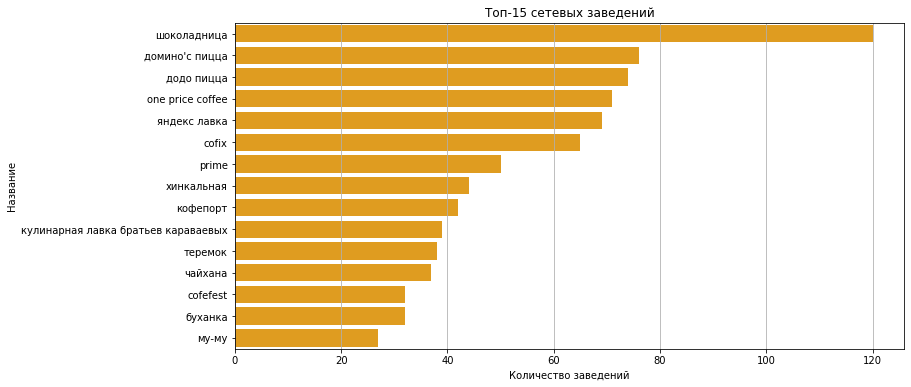

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result,
            x='count',
            y='name',
            color='orange')
plt.title('Топ-15 сетевых заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Название')

plt.grid(axis='x')

На основе полученных данных можно сделать следующие выводы о топ-15 популярных сетях в Москве:
1. ***Топ популярных заведений:*** 
- Кофейни лидируют по количеству заведений:
    - "Шоколадница" (120)

    - "One Price Coffee" (71)

    - "Cofix" (65)

    - "Кофепорт" (42)

    - "Cofefest" (32)
        
Всего в топ-15 кофейни представлены 5 раз, что делает их самой распространённой
    
   - Следом идут пиццерии (домино'с пицца(76), додо пицца(74))


   - Рестораны и кафе представлены меньшим числом заведений:

        - "Яндекс Лавка" (69, ресторан)

        - "Хинкальная" (44, кафе)

        - "Кулинарная Лавка братьев Караваевых" (39, кафе)

        - "Теремок" (38, ресторан)

        - "Чайхана" (37, кафе)

        - "Му-Му" (27, кафе)

Таким образом, кофейни и пиццерии доминируют по количеству точек, тогда как рестораны и кафе менее распространены в сетевом формате.

2. ***Средний рейтинг:***

**Самые высокие рейтинги** у заведений с небольшим количеством точек:

- "Кулинарная Лавка братьев Караваевых" (4.39, 39 заведений)

- "Буханка" (4.40, 32 заведения)

- "Хинкальная" (4.32, 44 заведения)

Среди **крупных сетей лучший рейтинг у**:

- "Додо Пицца" (4.29, 74 заведения)

- "Шоколадница" (4.18, 120 заведений)

Самый **низкий** рейтинг у:

- "Яндекс Лавка" (3.87, ресторан)

- "Чайхана" (3.92, кафе)

Можно заметить,что чем меньше сеть, тем выше рейтинг (возможно, из-за лучшего контроля качества). Однако "Додо Пицца" и "Шоколадница" показывают, что крупные сети тоже могут поддерживать высокий уровень.

3. ***Разнообразие категорий***: В выборке представлены различные категории заведений, больше всего кофеен, но кафе и рестораны тоже хорошо представлены. Пиццерии немногочисленны, но популярны. Это разнообразие позволяет удовлетворять различные потребности потребителей, от быстрого перекуса до полноценного обеда.


---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [45]:
moscow_df = join_df.copy()

moscow_df['middle_avg_bill'] = moscow_df['middle_avg_bill'].replace(-1, pd.NA)

# Удаляем строки с отсутствующими значениями в столбце среднего чека
moscow_df = moscow_df.dropna(subset=['middle_avg_bill'])

# Функция для извлечения среднего чека
def extract_average_bill(value):
# Находим все числовые значения в строке
    numbers = re.findall(r'\d+', value)
    if len(numbers) == 2:
        # Если есть два числа, возвращаем их медиану
        return (int(numbers[0]) + int(numbers[1])) / 2
    elif len(numbers) == 1:
        # Если есть одно число, возвращаем его
        return int(numbers[0])

# Применяем функцию к столбцу avg_bill
moscow_df['middle_avg_bill'] = moscow_df['avg_bill'].apply(extract_average_bill)

Распределение цен в **Центральном округе**

Text(0.5, 0, 'Средний чек (руб.)')

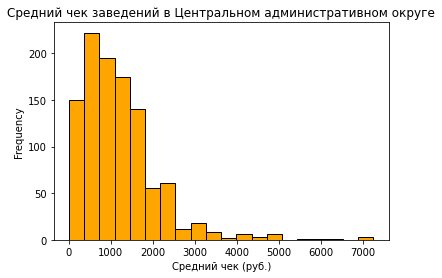

In [46]:
center_moscow_df = moscow_df[moscow_df['district'] == 'Центральный административный округ']

center_moscow_df['middle_avg_bill'].plot(kind='hist',
                                        color='orange',
                                        edgecolor='black',
                                        title='Средний чек заведений в Центральном административном округе',
                                        bins = 20)

plt.xlabel('Средний чек (руб.)')


На графике видно, что мода данного распределения составляет примерно 700-800р. , также можно увидеть, что есть аномально большие значения в районе 6000 и 7000.

In [47]:
district_avg_bill = moscow_df.groupby('district')['middle_avg_bill'].mean().reset_index()
sort_district_avg_bil = district_avg_bill.sort_values(by='middle_avg_bill', ascending = False)
sort_district_avg_bil

,district,middle_avg_bill
5,Центральный административный округ,1191.058962
1,Западный административный округ,1053.227124
2,Северный административный округ,927.962733
8,Южный административный округ,834.399682
4,Северо-Западный административный округ,822.226115
0,Восточный административный округ,820.630769
7,Юго-Западный административный округ,792.565957
3,Северо-Восточный административный округ,716.614618
6,Юго-Восточный административный округ,654.103093


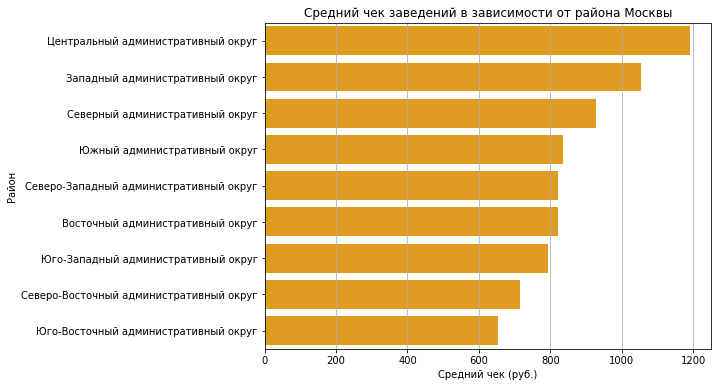

In [48]:
plt.figure(figsize=(8, 6))

sns.barplot(data=sort_district_avg_bil,
            x='middle_avg_bill',
            y='district',
            color='orange')
plt.title('Средний чек заведений в зависимости от района Москвы')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Район')

plt.grid(axis='x')

---


График демонстрирует, что лидерами по среднему чеку являются **Центральный (1191р.)** и **Западный (1053р.)** округи. Cаймый же низский средний чек в **Юго-Восточном** административном округе, всего 654р. В остальных районах Москвы средний чек ниже 1000р.

Таким образом, можно отметить прямую зависимость среднего чека от удаленности от центра. Это может быть связано с тем, что в центре города чаще бывают туристы, а также расположено множество офисов.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Анализ показал, что:

- Большинство заведений общественного питания находятся в центральном административном округе(2242), что в 2–3 раза больше, чем в других округах. Наименьшее число заведений — в Северо-Западном округе (409). В остальных округах количество заведений примерно одинаково (700–900). 


- Наиболее популярными категориями являются **кафе(2376), рестораны(2042) и кофейни(1413)**, наименее популярными **булочные и столовые** с 256 и 315 заведениями соответственно. 


- Большинство заведений являются несетевыми, их 5199 против 3203 сетевых. Такая же тенденция в основном сохраняется и в разрезе категорий.


- Средний рейтинг во всех категориях выше 4.0.


- Сильнее всего на рейтинг заведения влияет цена.


- Наибольший средний чек в ЦАО (1191руб.) и ЗАО (1053руб.). Самый низкий: Юго-Восточный округ (654руб.).


## Итоговый вывод и рекомендации

### Анализ данных о заведениях общественного питания в Москве выявил несколько ключевых тенденций и закономерностей:

1. **Распределение заведений по районам:** Большинство заведений сосредоточено в Центральном административном округе(2242), что в 2–3 раза больше, чем в других округах, что подтверждает его статус как главного делового и туристического центра. Наименее представлен Северо-Западный округ с всего 409 заведениями, в то время как остальные округа имеют схожее количество, варьирующее от 600 до 900 заведений.


2. **Популярные категории:** Наиболее распространенными категориями являются кафе (2376), рестораны (2042) и кофейни (1413). Менее популярны булочные (256) и столовые (315), что может указывать на предпочтения потребителей в сторону более разнообразных и качественных предложений.

    В ЦАО доминируют рестораны (670 заведений), что связано с высокой проходимостью и туристической привлекательностью.


3. **Сетевые и несетевые заведения:** В целом несетевые заведений больше 5199 против 3203 сетевых.

    Сетевые форматы преобладают в :

    - Булочных (61% сетевых),

    - Пиццериях (52%),

    - Кофейнях (51%).
    
    В остальных категориях доля сетевых заведений не превышает 40%.

    Также среди сетевых заведений из топ-15 можно заметить тенденцию: чем меньше сеть, тем выше рейтинг, возможно, из-за лучшего контроля качества. Однако "Додо Пицца" и "Шоколадница" показывают, что крупные сети тоже могут поддерживать высокий уровень.
    
    
4. **Рейтинг заведений:** Рейтинг слабо зависит от категорииво. В каждой категории он выше 4.0, что показывает необходимость поддержания высоких стандартов качества вне зависимости от выбора категории. Одноко рейтинг сильно зависит от ценового позиционирования, что подтверждается коэффициент корреляции в 0.200 и p-value < 0.05.


5. **Средний чек:** Наивысшие значения среднего чека наблюдаются в Центральном (1191руб.) и Западном округах(1053руб.), в то время как в Юго-Восточном округе он составляет всего 654 руб.

    Таким образом, есть прямая тенденция: Чем ближе к центру, тем выше цены (+20–40%).Это может быть связано с более высокой покупательной способностью населения в центральных районах.

### Рекомендации для заказчика:

- В Центральном административном округе и Западном административном округе сфокусироваться на **премиальных форматах** (кофейни, рестораны) с средним чеком более 1000 руб. Делать акцент на уникальность(авторская кухня, атмосфера).


- В спальных округах развивать **бюджетные** кафе и фастфуд (чек до 800 руб.).


- Для сетей: развивать булочные, кофейни и пиццерии.


- Рекомендуется провести более глубокий анализ ценовой политики, особенно в Центральном округе, чтобы определить, какие факторы способствуют высокому среднему чеку.


- Выяснить с чем связаны аномальные значения посадочных мест (>500), которые могут быть связаны с необходимостью наличия VIP или банкетных залов в некоторых категориях заведений.



Для дальнейшего анализа стоит проанализировать **сезонности спроса**, а также разработать ценовые стратегии для **каждого округа**